###  print out structures

In [1]:
import random
import numpy as np
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot
np.random.seed(1337)
random.seed(1337)

#### Value

Value created hello1
Value(name=hello1,data=4.5, grad=0)
Value(name=hello1,data=4.5, grad=0)


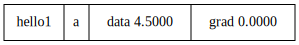

In [2]:
Value.static_var=0
a=Value(4.5,label='a',name='hello')
print(a)
draw_dot(a)

#### Neuron

In [3]:
nin=1  #number of inputs
Value.static_var=0

myNeuron=Neuron(nin)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b label: ",myNeuron.b.label)
print("number of parameters ", len(myNeuron.parameters()))
print(myNeuron.parameters())

# xi=[1,2,3,4]
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
loss_Neuron=myNeuron(xi)
print("activation: ",loss_Neuron)
loss_Neuron.backward()


Value created new1
Value created new2
number of inputs:  1
Neuron:  ReLUNeuron(1)
weights:  [Value(name=new1,data=0.23550571390294128, grad=0)]
b:  Value(name=new2,data=0, grad=0)
b label:  b
number of parameters  2
[Value(name=new1,data=0.23550571390294128, grad=0), Value(name=new2,data=0, grad=0)]
inputs  [8]
Value created new3
Value created new4
Value created new5
Value created new6
activation:  Value(name=new6,data=1.8840457112235303, grad=0)


Value(name=new2,data=0, grad=1)
Value(name=new5,data=1.8840457112235303, grad=1)
Value(name=new4,data=1.8840457112235303, grad=1)
Value(name=new6,data=1.8840457112235303, grad=1)
Value(name=new1,data=0.23550571390294128, grad=8)
Value(name=new3,data=8, grad=0.23550571390294128)


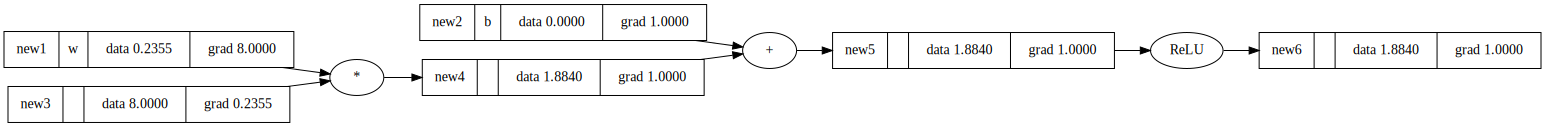

In [4]:
draw_dot(loss_Neuron)

#### Layer

In [5]:
nin=4  #number of inputs
Value.static_var=0

myLayer=Layer(nin,7)
print("Layer: ",myLayer)
print("Neurons: ",myLayer.neurons)

for neuron in myLayer.neurons:
    print("Neuron: ",neuron)


Value created new1
Value created new2
Value created new3
Value created new4
Value created new5
Value created new6
Value created new7
Value created new8
Value created new9
Value created new10
Value created new11
Value created new12
Value created new13
Value created new14
Value created new15
Value created new16
Value created new17
Value created new18
Value created new19
Value created new20
Value created new21
Value created new22
Value created new23
Value created new24
Value created new25
Value created new26
Value created new27
Value created new28
Value created new29
Value created new30
Value created new31
Value created new32
Value created new33
Value created new34
Value created new35
Layer:  Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)]
Neurons:  [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)]
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
Neuron:  ReLUNeuron(4)
N

#### Multi Layer Perceptron

In [6]:
# initialize a model 
nin=5  #number of inputs
Value.static_var=0

model = MLP(nin, [4, 4, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))
xi= np.random.randint(1,10, size=(nin))   # inputs
print("inputs ", xi)
loss_model=myNeuron(xi)
print("activation: ",loss_model)


Value created new1
Value created new2
Value created new3
Value created new4
Value created new5
Value created new6
Value created new7
Value created new8
Value created new9
Value created new10
Value created new11
Value created new12
Value created new13
Value created new14
Value created new15
Value created new16
Value created new17
Value created new18
Value created new19
Value created new20
Value created new21
Value created new22
Value created new23
Value created new24
Value created new25
Value created new26
Value created new27
Value created new28
Value created new29
Value created new30
Value created new31
Value created new32
Value created new33
Value created new34
Value created new35
Value created new36
Value created new37
Value created new38
Value created new39
Value created new40
Value created new41
Value created new42
Value created new43
Value created new44
Value created new45
Value created new46
Value created new47
Value created new48
Value created new49
MLP of [Layer of [ReLUNeuron(

## Gradient

In [7]:
Value.static_var=0

myNeuron1 = Neuron(1,nonlin=False)
myNeuron2 = Neuron(1,nonlin=False)
print(myNeuron1.parameters())
print("weights: ",myNeuron1.w)

print(myNeuron2.parameters())

input1 = [1.0]
input2 = [1.0]
loss = myNeuron1(input1) * myNeuron2(input2)
print("loss=",loss)

#draw_dot(loss)
loss.backward()

Value created new1
Value created new2
Value created new3
Value created new4
[Value(name=new1,data=0.797578856715021, grad=0), Value(name=new2,data=0, grad=0)]
weights:  [Value(name=new1,data=0.797578856715021, grad=0)]
[Value(name=new3,data=0.6099780726775426, grad=0), Value(name=new4,data=0, grad=0)]
Value created new5
Value created new6
Value created new7
Value created new8
Value created new9
Value created new10
Value created new11
loss= Value(name=new11,data=0.4865056138273864, grad=0)


Value(name=new7,data=0.797578856715021, grad=0.6099780726775426)
Value(name=new4,data=0, grad=0.797578856715021)
Value(name=new11,data=0.4865056138273864, grad=1)
Value(name=new3,data=0.6099780726775426, grad=0.797578856715021)
Value(name=new2,data=0, grad=0.6099780726775426)
Value(name=new10,data=0.6099780726775426, grad=0.797578856715021)
Value(name=new1,data=0.797578856715021, grad=0.6099780726775426)
Value(name=new9,data=0.6099780726775426, grad=0.797578856715021)
Value(name=new6,data=0.797578856715021, grad=0.6099780726775426)
Value(name=new8,data=1.0, grad=0.4865056138273864)
Value(name=new5,data=1.0, grad=0.4865056138273864)


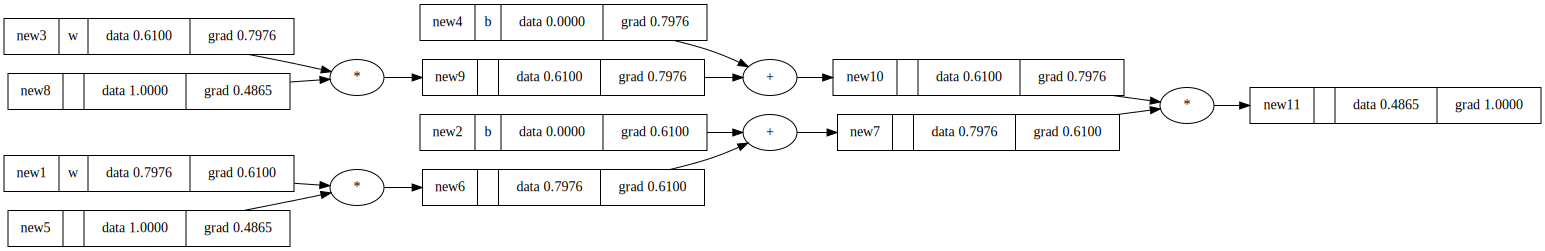

In [8]:
draw_dot(loss)